In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [2]:
# Load the data
df = pd.read_csv("D:/Linear-Regression/seattleWeather_1948-2017.csv")
df.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1/1/1948,0.47,51,42,True
1,1/2/1948,0.59,45,36,True
2,1/3/1948,0.42,45,35,True
3,1/4/1948,0.31,45,34,True
4,1/5/1948,0.17,45,32,True
5,1/6/1948,0.44,48,39,True
6,1/7/1948,0.41,50,40,True
7,1/8/1948,0.04,48,35,True
8,1/9/1948,0.12,50,31,True
9,1/10/1948,0.74,43,34,True


In [3]:
df.shape

(25551, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
df["RAIN"].value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

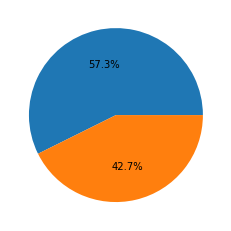

In [6]:
rain_size = df["RAIN"].value_counts(sort=1)
plt.pie(rain_size, autopct="%1.1f%%")
plt.show()

In [7]:
# Missing value
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [8]:
df.isnull().any()

DATE    False
PRCP     True
TMAX    False
TMIN    False
RAIN     True
dtype: bool

In [9]:
df.isnull().sum().sum()

6

In [10]:
df.dropna(axis=0, inplace=True)
#df = df.dropna(axis=0)

In [11]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


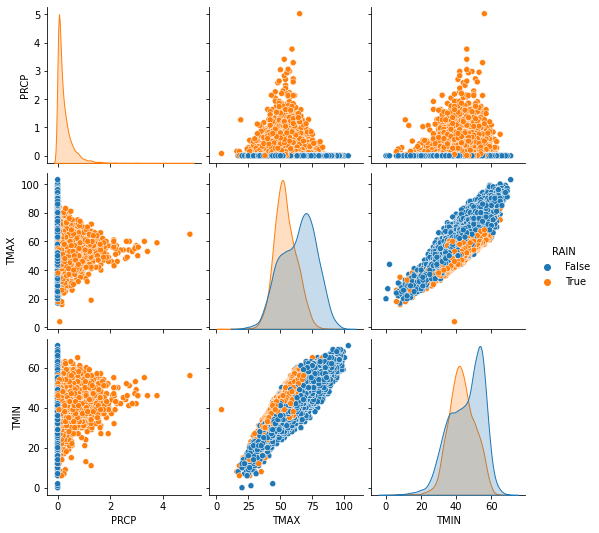

In [12]:
sns.pairplot(df, hue="RAIN")

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder = LabelEncoder()
df["RAIN"] = labelencoder.fit_transform(df["RAIN"])

print(df.head(20))

         DATE  PRCP  TMAX  TMIN  RAIN
0    1/1/1948  0.47    51    42     1
1    1/2/1948  0.59    45    36     1
2    1/3/1948  0.42    45    35     1
3    1/4/1948  0.31    45    34     1
4    1/5/1948  0.17    45    32     1
5    1/6/1948  0.44    48    39     1
6    1/7/1948  0.41    50    40     1
7    1/8/1948  0.04    48    35     1
8    1/9/1948  0.12    50    31     1
9   1/10/1948  0.74    43    34     1
10  1/11/1948  0.01    42    32     1
11  1/12/1948  0.00    41    26     0
12  1/13/1948  0.00    45    29     0
13  1/14/1948  0.00    38    26     0
14  1/15/1948  0.00    34    31     0
15  1/16/1948  0.00    34    28     0
16  1/17/1948  0.00    35    29     0
17  1/18/1948  0.00    33    28     0
18  1/19/1948  0.00    34    27     0
19  1/20/1948  0.00    36    29     0


# Logistic Regression

In [15]:
x = df[["PRCP", "TMAX", "TMIN"]]
y = df["RAIN"]

In [16]:
x.shape

(25548, 3)

In [17]:
y.shape

(25548,)

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
print(x_train.shape)
print(x_test.shape)

(20438, 3)
(5110, 3)


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred = LR_model.predict(x_test)

In [26]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.9297455968688846


In [31]:
print(LR_model.coef_)

[[42.67235668 -0.16299836  0.17264637]]


In [34]:
weights = pd.Series(LR_model.coef_[0], index = x.columns.values)
print(weights)

PRCP    42.672357
TMAX    -0.162998
TMIN     0.172646
dtype: float64
